# Operations Classes
Make a operations classes to feed in the inputs and process the outputs

In [94]:
class Operation():
    
    def __init__(self,  input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self) ## Append the operations class to global 'default graph'
            
    def compute(self):
        pass           ##Should be overridden by other classes

In [95]:
class Add(Operation):
    
    def __init__(self, x, y):
        super().__init__([x,y])   ##Inherits the init from Operation class and overrides it.
    
    def compute(self, xVariable, yVariable):
        self.inputs = [xVariable, yVariable]
        return (xVariable + yVariable)

In [96]:
class Multiply(Operation):
        
    def __init__(self, x, y):
        super().__init__([x,y])   ##Inherits the init from Operation class and overrides it.
        
    def compute(self, xVariable, yVariable):
        self.inputs = [xVariable, yVariable]
        return (xVariable * yVariable)

In [97]:
class MatMul(Operation):
        
    def __init__(self, x, y):
        super().__init__([x,y])
    
    def compute(self, xVariable, yVariable):
        self.inputs = [xVariable, yVariable]
        return xVariable.dot(yVariable)  ##Assumes that the xVariable is a numpy array 

# Placeholder Class
A placeholder class to basically get the input data and feed it to the neural network. It serves as a template to the incoming data.

In [98]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self) ## Grab global graph variable and append a placeholder to it
        

# Variable Class
It represents the variables that are to be passed on to the other classes

In [99]:
class Variable():
    
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self) ## Grab global graph variable and append vars to it

# Graph Class
It serves as a connector between the placeholders, variables to the appropriate operations classes. It is a global object.

In [100]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def setDefault(self):
         global _default_graph ## Set the class as global
         
         _default_graph = self

# Post-order function
Make sure that the multiplication happens before addition. Tree-traversal is being used to implement the function.

In [101]:
def traverse_postOrder(operation):
    
    """
    Post-order traversal of nodes. Checks and corrects that the operations 
    follow the order multiplication and then addition ie, (A*x) and then '+ B'
    Where A is the input, x is the weight(random) and B is the bias.
    """
    nodes_postOrder = []
    def fixOrder(node):
            if isinstance(node, Operation):
                for input_node in node.input_nodes:
                    fixOrder(input_node)
            nodes_postOrder.append(node)
            
    fixOrder(operation)
    return nodes_postOrder

# Session
A class that creates a session for the neural network to work. It will work as a kind of an environment for the functioning of the neural network.

In [102]:
class Session():
    
    def run(self, operation, feed_dict={}):    ## Feed a batch of data through the dict
        nodes_postOrder = traverse_postOrder(operation)
        
        for node in nodes_postOrder:
            
            if (type(node) == Placeholder):
                node.output = feed_dict[node]
            
            elif (type(node)) == Variable:
                node.output = node.value
            
            else:
                ##Operations
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            
            if (type(node.output == list)):
                node.output = np.array(node.output)
                
        return operation.output

# Classification 
## Sigmoid 
I have chosen sigmoid function as the activation function as I think it is the most convenient for a simple application.


In [103]:
import numpy as np

In [104]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, z_value):
        return (1/(1 + np.exp(-z_value)))

In [105]:
from sklearn.datasets import make_blobs

In [106]:
data = make_blobs(n_samples=100, n_features=2, centers=2, random_state=100)
## This creates a basic bindry classification problem which is perfect for 
## testing this neural network

In [107]:
data

(array([[  3.36818459e-01,  -3.40287961e+00],
        [ -1.08726796e+00,   5.80147972e+00],
        [ -1.93336328e+00,   5.70953908e+00],
        [ -1.63584937e+00,   8.88579630e+00],
        [  5.41860777e-01,  -4.37693628e+00],
        [  2.66345400e-01,   7.40859703e+00],
        [  1.64692124e+00,  -4.00437943e+00],
        [  5.36321701e-01,  -5.12183028e+00],
        [  4.10071850e-01,  -3.99744881e+00],
        [ -3.39121202e-01,   8.97323488e+00],
        [  1.84941962e+00,  -3.91839346e+00],
        [ -7.56585997e-01,   5.28608375e+00],
        [ -8.36552370e-01,  -5.56887330e+00],
        [  2.84503785e-01,  -3.61576523e+00],
        [  1.44867217e+00,  -5.53713539e+00],
        [  2.74467226e+00,  -4.80951565e+00],
        [  1.59909918e+00,  -3.07105617e+00],
        [ -1.31673099e+00,   6.54706372e+00],
        [ -1.68442974e+00,   7.91278699e+00],
        [  1.10594346e+00,  -4.41906375e+00],
        [  2.48708050e+00,  -2.89100712e+00],
        [  5.87148931e-03,  -3.183

In [108]:
data[0]

array([[  3.36818459e-01,  -3.40287961e+00],
       [ -1.08726796e+00,   5.80147972e+00],
       [ -1.93336328e+00,   5.70953908e+00],
       [ -1.63584937e+00,   8.88579630e+00],
       [  5.41860777e-01,  -4.37693628e+00],
       [  2.66345400e-01,   7.40859703e+00],
       [  1.64692124e+00,  -4.00437943e+00],
       [  5.36321701e-01,  -5.12183028e+00],
       [  4.10071850e-01,  -3.99744881e+00],
       [ -3.39121202e-01,   8.97323488e+00],
       [  1.84941962e+00,  -3.91839346e+00],
       [ -7.56585997e-01,   5.28608375e+00],
       [ -8.36552370e-01,  -5.56887330e+00],
       [  2.84503785e-01,  -3.61576523e+00],
       [  1.44867217e+00,  -5.53713539e+00],
       [  2.74467226e+00,  -4.80951565e+00],
       [  1.59909918e+00,  -3.07105617e+00],
       [ -1.31673099e+00,   6.54706372e+00],
       [ -1.68442974e+00,   7.91278699e+00],
       [  1.10594346e+00,  -4.41906375e+00],
       [  2.48708050e+00,  -2.89100712e+00],
       [  5.87148931e-03,  -3.18314256e+00],
       [  

In [109]:
data[0][1][0]

-1.0872679645953607

In [110]:
import pandas as pd

In [111]:
dataDf = pd.DataFrame(data=(data[0][i] for i in range(0, 100)), columns=['Features_x', 'Features_y'])

In [112]:
dataDf.head()

,Features_x,Features_y
0,0.336818,-3.402880
1,-1.087268,5.801480
2,-1.933363,5.709539
3,-1.635849,8.885796
4,0.541861,-4.376936


In [113]:
dataClassDf = pd.DataFrame(data=(data[1][i] for i in range(0, 100)), columns=['Class'])

In [114]:
dataClassDf.head()

,Class
0,0
1,1
2,1
3,1
4,0


In [186]:
dataDf = pd.concat([dataDf, dataClassDf], axis=1)

In [187]:
dataDf.head()

,Features_x,Features_y,Class
0,0.336818,-3.402880,0
1,-1.087268,5.801480,1
2,-1.933363,5.709539,1
3,-1.635849,8.885796,1
4,0.541861,-4.376936,0


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
features = data[0]
labels = data[1]

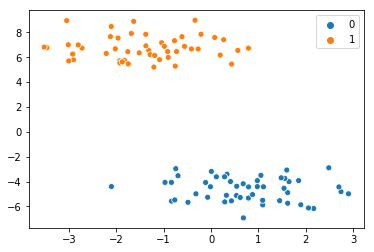

In [118]:
sns.scatterplot(x=features[:,0], y=features[:,1], hue=labels)

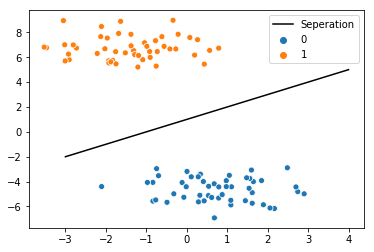

In [119]:
x = np.linspace(-3, 4)
y = x + 1 ## You could try different line parameters as well
sns.scatterplot(x=features[:,0], y=features[:,1], hue=labels)
plt.plot(x, y, 'k', label='Seperation')
plt.legend()

# Example Session

In [120]:
g = Graph()
g.setDefault()

In [121]:
x = Placeholder()
w = Variable([1, -1]) ##The multiplication matrix as discussed above
b = Variable(-5)

In [122]:
z = Add(MatMul(w,x),b)

In [123]:
a = Sigmoid(z)

In [124]:
sess = Session()

In [135]:
sess.run(operation=a, feed_dict={x:[data[0][1][0], data[0][1]][1]})

array(6.867196956240302e-06)

In [126]:
def getClass(a,b):
    #x = Placeholder()
    #w = Variable([1, -1]) ##The multiplication matrix as discussed above
    #b = Variable(-5) 
    #z = Add(MatMul(w,x),b)
    #a = Sigmoid(z)
    #sess = Session()
    if (sess.run(operation=a, feed_dict={x:[a,b]})) > 0:
        return 1
    else :
        return 0

In [127]:
float(data[0][0][1])

-3.402879612990731

In [174]:
pred = np.empty([100])
for i in range(0, 100):
    if np.around(sess.run(operation=a, feed_dict={x:[data[0][i][0], data[0][i][1]]})) == 0:
        pred[i] = int(1)
    else :
        pred[i] = int(0)
predInt = pred.astype(int)

In [176]:
predInt

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1])

In [171]:
type(pred[0])

numpy.float64

In [177]:
predDf = pd.DataFrame(data=predInt, columns=['Predictions'])

In [178]:
predDf.head()

,Predictions
0,1
1,1
2,1
3,1
4,1


In [179]:
from sklearn.metrics import classification_report

In [189]:
print(classification_report(dataDf['Class'], predDf['Predictions']))

             precision    recall  f1-score   support

          0       1.00      0.60      0.75        50
          1       0.71      1.00      0.83        50

avg / total       0.86      0.80      0.79       100



In [190]:
results = pd.concat([dataDf, predDf], axis=1)

In [191]:
results.head()

,Features_x,Features_y,Class,Predictions
0,0.336818,-3.402880,0,1
1,-1.087268,5.801480,1,1
2,-1.933363,5.709539,1,1
3,-1.635849,8.885796,1,1
4,0.541861,-4.376936,0,1


In [198]:
results.to_csv('Pred_ManualNeuralNet.csv', header=True, index_label='Index')